<img src="http://www.timzhangyuxuan.com/static/images/project_DCGAN/structure.png" alt="nn" style="width: 800px;"/>

- [GAN Tutorial / NIPS 2016](https://www.youtube.com/watch?v=YpdP_0-IEOw)
- [GAN Tutorial Slides / NIPS 2016](https://arxiv.org/abs/1701.00160)
- [Generative adversarial nets I Goodfellow, J Pouget-Abadie, M Mirza, B Xu, D Warde-Farley, S Ozair, Y. Bengio.](https://arxiv.org/pdf/1406.2661.pdf)
- [This Sem based on part of assignment 3 of cs231n](http://cs231n.github.io/assignments2017/assignment3/)


## MNIST Dataset 

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

def preprocess_img(x):
    return 2 * x - 1.0

def deprocess_img(x):
    return (x + 1.0) / 2.0

def rel_error(x,y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def count_params():
    param_count = np.sum([np.prod(x.get_shape().as_list()) for x in tf.global_variables()])
    return param_count


def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

/home/bkovalenko/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /tmp/mnist/train-images-idx3-ubyte.gz
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz


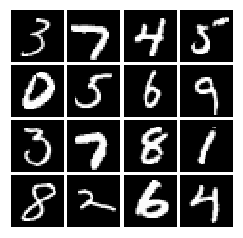

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/mnist', one_hot=False)
show_images(mnist.train.next_batch(16)[0])

## LeakyReLU

In [3]:
def leaky_relu(x, alpha=0.01):
    # implement LeakyReLU

## Random Noise

In [4]:
def sample_noise(batch_size, dim):
    # implement sampling of random noise vector of dim dimension

----

In [5]:
def discriminator(x):
    with tf.variable_scope("discriminator"):
        fc1 = tf.layers.dense(x, 256, activation=leaky_relu, use_bias=True)
        fc2 = tf.layers.dense(fc1, 256, activation=leaky_relu, use_bias=True)
        logits = tf.layers.dense(fc2, 1, activation=None, use_bias=True)
        return logits

In [6]:
def generator(z):
    with tf.variable_scope("generator"):
        fc1 = tf.layers.dense(z, 1024, activation=tf.nn.relu, use_bias=True)
        fc2 = tf.layers.dense(fc1, 1024, activation=tf.nn.relu, use_bias=True)
        img = tf.layers.dense(fc2, 784, activation=tf.tanh, use_bias=True)
        return img

# GAN Loss

Compute the generator and discriminator loss. The generator loss is:
$$\ell_G  =  -\mathbb{E}_{z \sim p(z)}\left[\log D(G(z))\right]$$
and the discriminator loss is:
$$ \ell_D = -\mathbb{E}_{x \sim p_\text{data}}\left[\log D(x)\right] - \mathbb{E}_{z \sim p(z)}\left[\log \left(1-D(G(z))\right)\right]$$

In [7]:
def gan_loss(logits_real, logits_fake):
    #implement GAN Loss
    return D_loss, G_loss

In [8]:
def get_solvers(learning_rate=1e-3, beta1=0.5):
    D_solver = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1)
    G_solver = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1)
    
    return D_solver, G_solver

----

In [9]:
tf.reset_default_graph()

# number of images for each batch
batch_size = 128
noise_dim = 96

x = tf.placeholder(tf.float32, [None, 784])
# sample noize and generate fake examples

with tf.variable_scope("") as scope:
    # get logits from discriminator for fake and real images

D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator') 

D_solver, G_solver = get_solvers()
D_loss, G_loss = gan_loss(logits_real, logits_fake)

D_train_step = D_solver.minimize(D_loss, var_list=D_vars)
G_train_step = G_solver.minimize(G_loss, var_list=G_vars)

In [10]:
# a giant helper function
def run_a_gan(sess, G_train_step, G_loss, D_train_step, D_loss,
              show_every=250, print_every=50, batch_size=128, num_epoch=10):

    # compute the number of iterations we need
    max_iter = int(mnist.train.num_examples*num_epoch/batch_size)
    for it in range(max_iter):
        # every show often, show a sample result
        if it % show_every == 0:
            samples = sess.run(G_sample)
            fig = show_images(samples[:16])
            plt.show()
            print()
        # run a batch of data through the network
        minibatch,minbatch_y = mnist.train.next_batch(batch_size)
        _, D_loss_curr = sess.run([D_train_step, D_loss], feed_dict={x: minibatch})
        _, G_loss_curr = sess.run([G_train_step, G_loss])

        # print loss every so often.
        # We want to make sure D_loss doesn't go to 0
        if it % print_every == 0:
            print('Iter: {}, D: {:.4}, G:{:.4}'.format(it,D_loss_curr,G_loss_curr))
    print('Final images')
    samples = sess.run(G_sample)

    fig = show_images(samples[:16])
    plt.show()

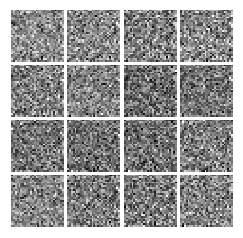

()
Iter: 0, D: 1.106, G:0.6896
Iter: 50, D: 0.2654, G:1.662
Iter: 100, D: 0.6139, G:1.565
Iter: 150, D: 1.082, G:1.16
Iter: 200, D: 0.914, G:2.181


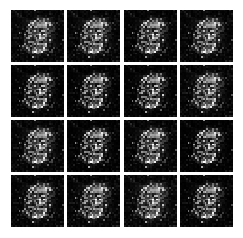

()
Iter: 250, D: 1.301, G:1.254
Iter: 300, D: 1.759, G:0.7334
Iter: 350, D: 1.288, G:1.655
Iter: 400, D: 1.032, G:1.346
Iter: 450, D: 1.238, G:1.175


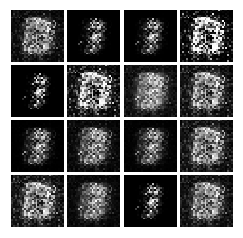

()
Iter: 500, D: 1.673, G:0.7438
Iter: 550, D: 1.102, G:1.23
Iter: 600, D: 2.555, G:0.05844
Iter: 650, D: 1.075, G:1.684
Iter: 700, D: 1.241, G:1.162


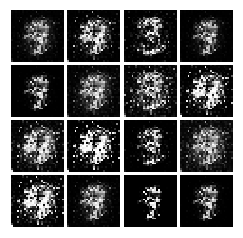

()
Iter: 750, D: 1.097, G:1.269
Iter: 800, D: 1.05, G:1.251
Iter: 850, D: 0.9948, G:1.0
Iter: 900, D: 1.065, G:1.568
Iter: 950, D: 1.616, G:0.8289


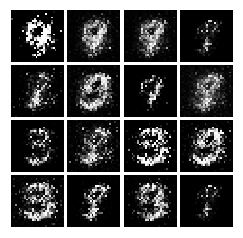

()
Iter: 1000, D: 1.115, G:1.244
Iter: 1050, D: 1.294, G:0.8283
Iter: 1100, D: 1.229, G:1.016
Iter: 1150, D: 1.231, G:1.351
Iter: 1200, D: 1.156, G:1.513


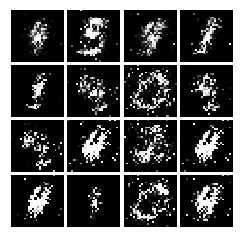

()
Iter: 1250, D: 1.911, G:0.8782
Iter: 1300, D: 1.275, G:0.6163
Iter: 1350, D: 1.229, G:1.497
Iter: 1400, D: 1.291, G:1.039
Iter: 1450, D: 1.1, G:1.381


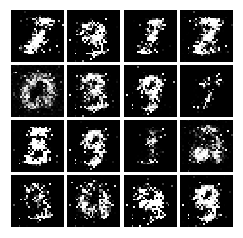

()
Iter: 1500, D: 1.291, G:0.9862
Iter: 1550, D: 1.244, G:1.009
Iter: 1600, D: 1.215, G:0.9753
Iter: 1650, D: 1.197, G:1.079
Iter: 1700, D: 1.362, G:0.739


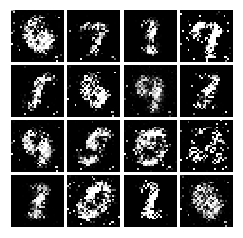

()
Iter: 1750, D: 1.295, G:0.9814
Iter: 1800, D: 1.31, G:1.023
Iter: 1850, D: 1.233, G:0.8451
Iter: 1900, D: 1.243, G:1.005
Iter: 1950, D: 1.169, G:1.009


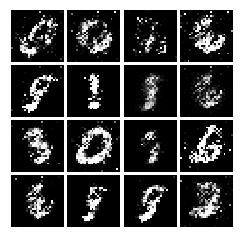

()
Iter: 2000, D: 1.258, G:0.9166
Iter: 2050, D: 1.28, G:0.8196
Iter: 2100, D: 1.358, G:1.028
Iter: 2150, D: 1.233, G:0.8471
Iter: 2200, D: 1.378, G:1.019


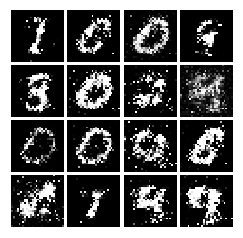

()
Iter: 2250, D: 1.426, G:0.8049
Iter: 2300, D: 1.37, G:0.8651
Iter: 2350, D: 1.309, G:0.7969
Iter: 2400, D: 1.352, G:0.7914
Iter: 2450, D: 1.35, G:0.9005


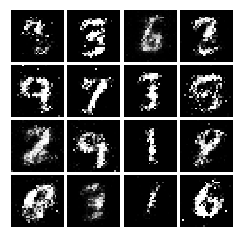

()
Iter: 2500, D: 1.385, G:0.7271
Iter: 2550, D: 1.364, G:0.8119
Iter: 2600, D: 1.327, G:0.9015
Iter: 2650, D: 1.328, G:0.7582
Iter: 2700, D: 1.35, G:0.8058


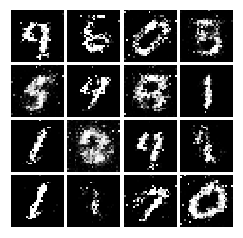

()
Iter: 2750, D: 1.337, G:0.778
Iter: 2800, D: 1.35, G:0.8056
Iter: 2850, D: 1.365, G:0.8027
Iter: 2900, D: 1.38, G:0.8594
Iter: 2950, D: 1.397, G:0.5893


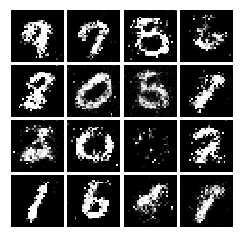

()
Iter: 3000, D: 1.328, G:0.8639
Iter: 3050, D: 1.26, G:0.8192
Iter: 3100, D: 1.28, G:0.9136
Iter: 3150, D: 1.246, G:0.8935
Iter: 3200, D: 1.465, G:1.065


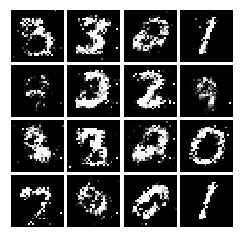

()
Iter: 3250, D: 1.257, G:0.8076
Iter: 3300, D: 1.279, G:0.8323
Iter: 3350, D: 1.186, G:0.6043
Iter: 3400, D: 1.312, G:0.8711
Iter: 3450, D: 1.288, G:0.8159


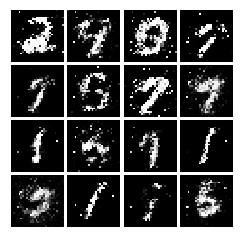

()
Iter: 3500, D: 1.325, G:0.8527
Iter: 3550, D: 1.28, G:0.844
Iter: 3600, D: 1.287, G:0.9025
Iter: 3650, D: 1.244, G:0.7706
Iter: 3700, D: 1.33, G:0.8466


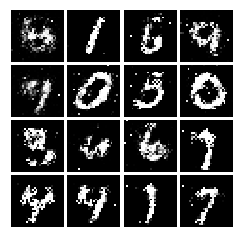

()
Iter: 3750, D: 1.32, G:0.8847
Iter: 3800, D: 1.354, G:0.8255
Iter: 3850, D: 1.307, G:0.9949
Iter: 3900, D: 1.3, G:0.8937
Iter: 3950, D: 1.328, G:0.8252


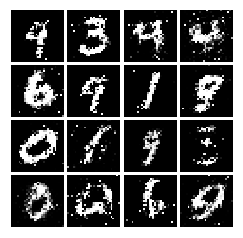

()
Iter: 4000, D: 1.282, G:0.7514
Iter: 4050, D: 1.347, G:0.8792
Iter: 4100, D: 1.354, G:0.8685
Iter: 4150, D: 1.323, G:0.9632
Iter: 4200, D: 1.412, G:0.7672


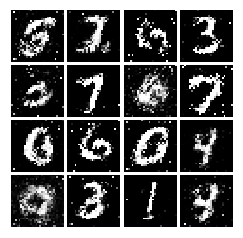

()
Iter: 4250, D: 1.326, G:0.8694
Final images


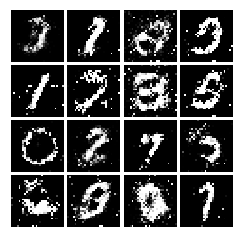

In [11]:
with get_session() as sess:
    sess.run(tf.global_variables_initializer())
    run_a_gan(sess,G_train_step,G_loss,D_train_step,D_loss)

# Least Squares GAN
[Least Squares GAN](https://arxiv.org/abs/1611.04076), a newer, more stable alternative to the original GAN loss function. We'll implement equation (9) in the paper, with the generator loss:
$$\ell_G  =  \frac{1}{2}\mathbb{E}_{z \sim p(z)}\left[\left(D(G(z))-1\right)^2\right]$$
and the discriminator loss:
$$ \ell_D = \frac{1}{2}\mathbb{E}_{x \sim p_\text{data}}\left[\left(D(x)-1\right)^2\right] + \frac{1}{2}\mathbb{E}_{z \sim p(z)}\left[ \left(D(G(z))\right)^2\right]$$


In [12]:
def lsgan_loss(score_real, score_fake):
    # implement LS GAN Loss
    return D_loss, G_loss

In [13]:
D_loss, G_loss = lsgan_loss(logits_real, logits_fake)
D_train_step = D_solver.minimize(D_loss, var_list=D_vars)
G_train_step = G_solver.minimize(G_loss, var_list=G_vars)

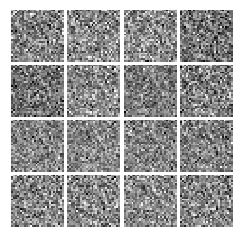

()
Iter: 0, D: 0.3506, G:0.4522
Iter: 50, D: 0.0395, G:0.7352
Iter: 100, D: 0.008507, G:0.6483
Iter: 150, D: 0.2048, G:0.3271
Iter: 200, D: 0.3302, G:0.179


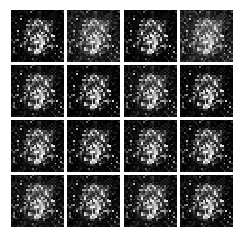

()
Iter: 250, D: 0.1813, G:0.3638
Iter: 300, D: 0.1508, G:0.3773
Iter: 350, D: 0.1412, G:0.4471
Iter: 400, D: 0.1246, G:0.3855
Iter: 450, D: 0.1489, G:0.3796


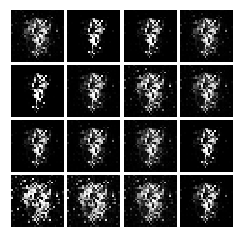

()
Iter: 500, D: 0.1458, G:0.2846
Iter: 550, D: 0.1353, G:0.383
Iter: 600, D: 0.1065, G:0.3835
Iter: 650, D: 0.1209, G:0.3356
Iter: 700, D: 0.1449, G:0.1832


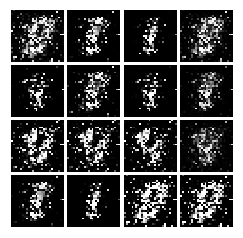

()
Iter: 750, D: 0.1316, G:0.3643
Iter: 800, D: 0.2045, G:0.9598
Iter: 850, D: 0.09666, G:0.3673
Iter: 900, D: 0.09056, G:0.3845
Iter: 950, D: 0.1604, G:0.2564


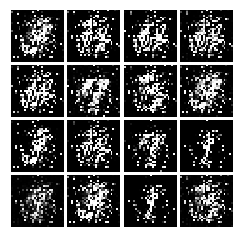

()
Iter: 1000, D: 0.1009, G:0.4393
Iter: 1050, D: 0.2747, G:0.4067
Iter: 1100, D: 0.1241, G:0.5035
Iter: 1150, D: 0.08757, G:0.4495
Iter: 1200, D: 0.1402, G:0.4729


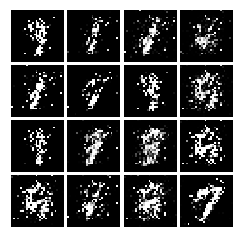

()
Iter: 1250, D: 0.1271, G:0.2741
Iter: 1300, D: 1.493, G:0.4128
Iter: 1350, D: 0.1583, G:0.3579
Iter: 1400, D: 0.1543, G:0.3485
Iter: 1450, D: 0.1586, G:0.6367


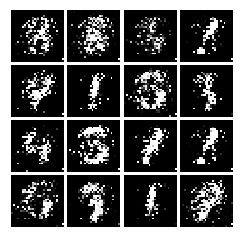

()
Iter: 1500, D: 0.2267, G:0.9922
Iter: 1550, D: 0.161, G:0.3664
Iter: 1600, D: 0.1625, G:0.2856
Iter: 1650, D: 0.2279, G:0.06782
Iter: 1700, D: 0.1835, G:0.1829


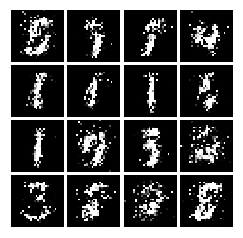

()
Iter: 1750, D: 0.2278, G:0.2386
Iter: 1800, D: 0.2003, G:0.1959
Iter: 1850, D: 0.1988, G:0.1844
Iter: 1900, D: 0.2027, G:0.1932
Iter: 1950, D: 0.206, G:0.2257


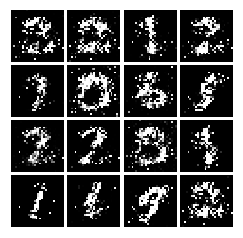

()
Iter: 2000, D: 0.2007, G:0.237
Iter: 2050, D: 0.2309, G:0.1782
Iter: 2100, D: 0.2223, G:0.1651
Iter: 2150, D: 0.2344, G:0.1844
Iter: 2200, D: 0.2045, G:0.2166


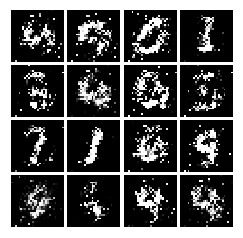

()
Iter: 2250, D: 0.2209, G:0.1728
Iter: 2300, D: 0.2015, G:0.2135
Iter: 2350, D: 0.2228, G:0.235
Iter: 2400, D: 0.2146, G:0.1657
Iter: 2450, D: 0.2194, G:0.181


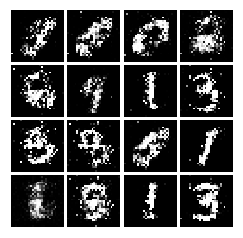

()
Iter: 2500, D: 0.2145, G:0.2414
Iter: 2550, D: 0.2425, G:0.1451
Iter: 2600, D: 0.2308, G:0.2549
Iter: 2650, D: 0.2329, G:0.191
Iter: 2700, D: 0.2409, G:0.1688


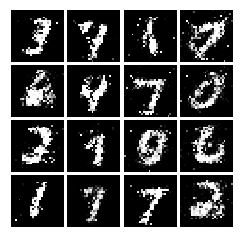

()
Iter: 2750, D: 0.2395, G:0.17
Iter: 2800, D: 0.2494, G:0.1592
Iter: 2850, D: 0.2426, G:0.1677
Iter: 2900, D: 0.2083, G:0.1766
Iter: 2950, D: 0.2344, G:0.1777


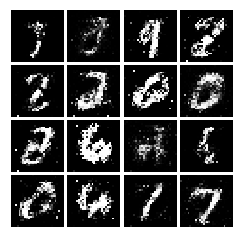

()
Iter: 3000, D: 0.2276, G:0.1609
Iter: 3050, D: 0.2299, G:0.1553
Iter: 3100, D: 0.2184, G:0.1948
Iter: 3150, D: 0.2272, G:0.1341
Iter: 3200, D: 0.2336, G:0.161


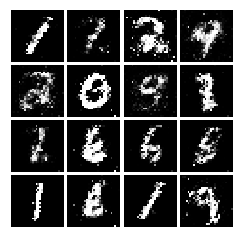

()
Iter: 3250, D: 0.2321, G:0.161
Iter: 3300, D: 0.2109, G:0.1565
Iter: 3350, D: 0.2079, G:0.1787
Iter: 3400, D: 0.2454, G:0.1565
Iter: 3450, D: 0.2413, G:0.1787


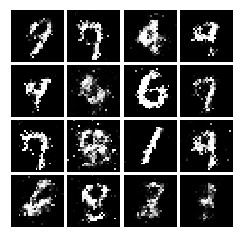

()
Iter: 3500, D: 0.2257, G:0.1582
Iter: 3550, D: 0.2265, G:0.1864
Iter: 3600, D: 0.2293, G:0.1661
Iter: 3650, D: 0.2427, G:0.1537
Iter: 3700, D: 0.214, G:0.1576


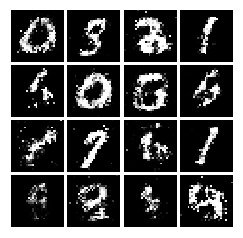

()
Iter: 3750, D: 0.2517, G:0.1654
Iter: 3800, D: 0.2449, G:0.1621
Iter: 3850, D: 0.2434, G:0.1522
Iter: 3900, D: 0.2434, G:0.188
Iter: 3950, D: 0.2183, G:0.168


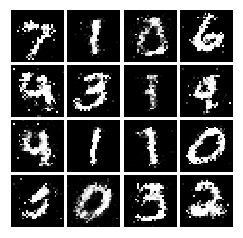

()
Iter: 4000, D: 0.2168, G:0.1536
Iter: 4050, D: 0.2351, G:0.1716
Iter: 4100, D: 0.2192, G:0.1713
Iter: 4150, D: 0.2177, G:0.157
Iter: 4200, D: 0.2386, G:0.1631


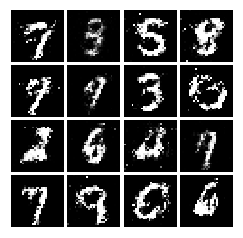

()
Iter: 4250, D: 0.2127, G:0.1738
Final images


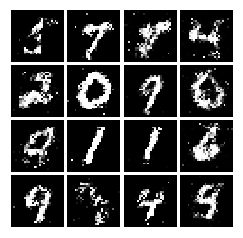

In [14]:
with get_session() as sess:
    sess.run(tf.global_variables_initializer())
    run_a_gan(sess, G_train_step, G_loss, D_train_step, D_loss)

## Deep Convolutional GANs

In [15]:
def discriminator(x):
    with tf.variable_scope("discriminator"):
        shape = tf.shape(x);
        images = tf.reshape(x, [shape[0], 28, 28, 1])
        
        conv1 = tf.layers.conv2d(images, filters=32, kernel_size=(5, 5),
                                 activation=leaky_relu, use_bias=True);
        
        pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID");
        
        conv2 = tf.layers.conv2d(pool1, filters=64, kernel_size=(5, 5),
                                 activation=leaky_relu, use_bias=True);
        
        pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID");
        
        flatten = tf.contrib.layers.flatten(pool2);
        dense1 = tf.layers.dense(flatten, 16*64, activation=leaky_relu, use_bias=True);
        
        logits = tf.layers.dense(dense1, 1, activation=None, use_bias=True);
        return logits

In [16]:
def generator(z):
    with tf.variable_scope("generator"):
        dense1 = tf.layers.dense(inputs=z, units=1024, activation=tf.nn.relu)
        batchnorm1 = tf.layers.batch_normalization(inputs=dense1)

        dense2 = tf.layers.dense(inputs=batchnorm1, units=6272, activation=tf.nn.relu)
        batchnorm2 = tf.layers.batch_normalization(inputs=dense2)

        images = tf.reshape(batchnorm2, [-1, 7, 7, 128])

        conv1 = tf.layers.conv2d_transpose(inputs=images, filters=64, kernel_size=[4, 4], 
                                           strides=2, padding='SAME', activation=tf.nn.relu)
        batchnorm3 = tf.layers.batch_normalization(inputs=conv1)

        conv2 = tf.layers.conv2d_transpose(inputs=batchnorm3, filters=1, kernel_size=[4, 4],
                                           strides=2, padding='SAME', activation=tf.tanh)

        img = tf.reshape(conv2, [-1, 28 * 28])
        return img

In [17]:
tf.reset_default_graph()

batch_size = 128
noise_dim = 96

x = tf.placeholder(tf.float32, [None, 784])
# sample noize and generate fake examples

with tf.variable_scope("") as scope:
    # get logits from discriminator for fake and real images

D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'generator') 

D_solver,G_solver = get_solvers()
D_loss, G_loss = gan_loss(logits_real, logits_fake)

D_train_step = D_solver.minimize(D_loss, var_list=D_vars)
G_train_step = G_solver.minimize(G_loss, var_list=G_vars)

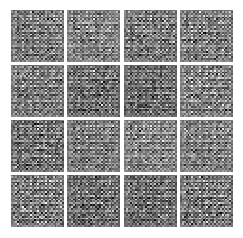

()
Iter: 0, D: 1.572, G:0.6556
Iter: 50, D: 0.2297, G:2.661
Iter: 100, D: 0.4915, G:2.173
Iter: 150, D: 0.4899, G:2.574
Iter: 200, D: 0.7739, G:2.494


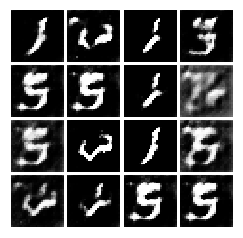

()
Iter: 250, D: 1.009, G:0.9775
Iter: 300, D: 0.6079, G:2.971
Iter: 350, D: 0.556, G:3.29
Iter: 400, D: 0.66, G:2.16
Iter: 450, D: 0.399, G:3.685


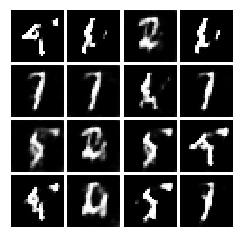

()
Iter: 500, D: 0.3656, G:2.702
Iter: 550, D: 0.4598, G:2.095
Iter: 600, D: 0.6347, G:2.447
Iter: 650, D: 0.5496, G:1.191
Iter: 700, D: 0.4643, G:2.877


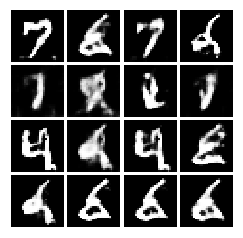

()
Iter: 750, D: 0.6185, G:3.839
Iter: 800, D: 0.2187, G:3.582
Iter: 850, D: 0.3146, G:2.94
Iter: 900, D: 0.4238, G:4.605
Iter: 950, D: 0.614, G:1.938


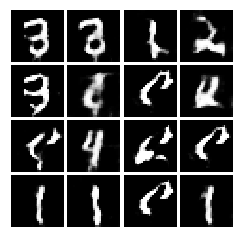

()
Iter: 1000, D: 0.3102, G:2.909
Iter: 1050, D: 0.4375, G:2.609
Iter: 1100, D: 0.6658, G:3.103
Iter: 1150, D: 0.6261, G:1.699
Iter: 1200, D: 1.541, G:1.707


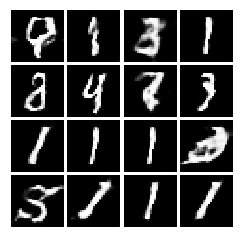

()
Iter: 1250, D: 0.5847, G:2.32
Iter: 1300, D: 0.7671, G:1.303
Iter: 1350, D: 0.4726, G:2.128
Iter: 1400, D: 0.57, G:2.409
Iter: 1450, D: 0.6627, G:1.593


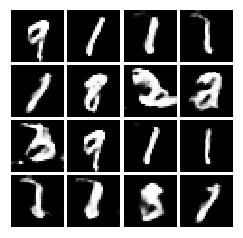

()
Iter: 1500, D: 0.6602, G:1.576
Iter: 1550, D: 0.6027, G:1.789
Iter: 1600, D: 0.5598, G:2.133
Iter: 1650, D: 0.5019, G:1.788
Iter: 1700, D: 0.9708, G:1.039


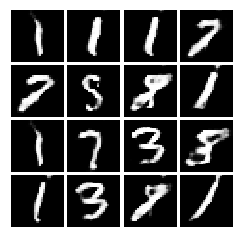

()
Iter: 1750, D: 0.6817, G:2.692
Iter: 1800, D: 0.8244, G:1.134
Iter: 1850, D: 0.6449, G:1.95
Iter: 1900, D: 0.5668, G:1.646
Iter: 1950, D: 0.738, G:1.469


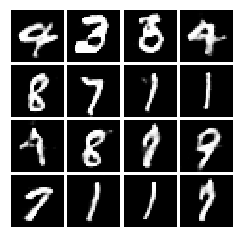

()
Iter: 2000, D: 0.682, G:2.6
Iter: 2050, D: 0.6285, G:2.016
Iter: 2100, D: 0.6011, G:1.535
Final images


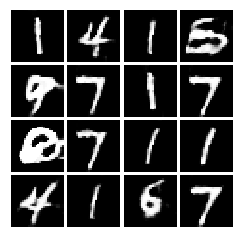

In [18]:
with get_session() as sess:
    sess.run(tf.global_variables_initializer())
    run_a_gan(sess,G_train_step,G_loss,D_train_step,D_loss,num_epoch=5)